Summary:
    
1. Crawling tweets with Tweepy and json
2. Dataset handling/cleaning
3. Dataset Description
4. Word Tokenization
5. Most common words and bigrams
6. Term frequencies and clustering
7. Sentiment counting
8. Topic Modeling
9. Named entities

# 1. Crawling tweets with Tweepy and json



Documentation here: http://docs.tweepy.org/en/v3.4.0/streaming_how_to.html

don't run the cells in this part

In [ ]:
import tweepy
from tweepy import OAuthHandler
 
ACCESS_TOKEN= ...
ACCESS_SECRET=...
CONSUMER_KEY= ...
CONSUMER_SECRET=...

 
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
 
api = tweepy.API(auth)


In [ ]:
# class use json
import json

class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, api=None):
        # inherit class attributes
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("Tweets_Olympics_05_03_2.txt", "w+") 
        #filename is modified manually according to date + number if operation repeated several times per same day

    def on_status(self, status):
        tweet = status._json
        
        #we want to get rid of the RT, in order to avoid having the same tweet many times in our list of tweets and focus on original tweets
        #which express their author's opinion - supposedly. 
        #We also add a condition to keep tweets where language is recognized as Enligsh
        
        if not tweet['retweeted'] and 'RT @' not in tweet['text'] and 'en' in tweet["lang"]:  
            self.file.write(json.dumps(tweet) + '\n' )
        
        self.num_tweets += 1
        if self.num_tweets < 1000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [327]:
# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)


stream.filter(track=['olympics', 'pyeongchang'], async=True)

NameError: name 'MyStreamListener' is not defined

# 2 Dataset handling/cleaning

In [2]:
import nlp_utilities as mytools

files = mytools.get_filenames("tweets_")
files

['tweets_/Tweets_Olympics_02_03.txt',
 'tweets_/Tweets_Olympics_02_03_2.txt',
 'tweets_/Tweets_Olympics_03_03.txt',
 'tweets_/Tweets_Olympics_13_02_.txt',
 'tweets_/Tweets_Olympics_13_02__2.txt',
 'tweets_/Tweets_Olympics_13_02__3.txt',
 'tweets_/Tweets_Olympics_15_02.txt',
 'tweets_/Tweets_Olympics_15_02__2.txt',
 'tweets_/Tweets_Olympics_15_02__3.txt',
 'tweets_/Tweets_Olympics_20_02.txt',
 'tweets_/Tweets_Olympics_20_02_2.txt',
 'tweets_/Tweets_Olympics_20_02_3.txt',
 'tweets_/Tweets_Olympics_23_02.txt',
 'tweets_/Tweets_Olympics_23_02_2.txt',
 'tweets_/Tweets_Olympics_28_02.txt',
 'tweets_/Tweets_Olympics_28_02_2.txt']

In [3]:
# Import package
import json

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file

for file in files:
    h=open(file,'r')
    for i in h:
        tmp=json.loads(i)
        tweets_data.append(tmp)

    

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


tweets_df=pd.DataFrame(tweets_data)
tweets_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,None,None,Fri Mar 02 14:57:27 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Who won Team Canada’s 29 medals in PyeongChang...,1520002647287,False,"{'id': 890602133116125184, 'id_str': '89060213..."
1,None,None,Fri Mar 02 14:57:29 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Ever been fired by a girlfriend...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Ever been fired by a girlfriend? Boyfriend? Bo...,1520002649619,True,"{'id': 952788883200069632, 'id_str': '95278888..."
2,None,None,Fri Mar 02 14:57:36 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""https://about.twitter.com/products/tw...",Swedish Winter Olympics ratings fall in snow\n...,1520002656664,False,"{'id': 143484502, 'id_str': '143484502', 'name..."
3,None,None,Fri Mar 02 14:57:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Top international performances from PyeongChan...,1520002659051,False,"{'id': 890602133116125184, 'id_str': '89060213..."
4,None,None,Fri Mar 02 14:57:41 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '@SenGillibrand My nickname is T...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@SenGillibrand My nickname is Tank \n\nI been ...,1520002661365,True,"{'id': 328474134, 'id_str': '328474134', 'name..."
5,None,None,Fri Mar 02 14:57:49 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Team Canada’s most memorable moments from Pyeo...,1520002669754,False,"{'id': 890602133116125184, 'id_str': '89060213..."
6,None,None,Fri Mar 02 14:57:50 +0000 2018,NaN,"{'hashtags': [{'text': 'martialarts', 'indices...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://www.ajaymatharu.com/"" rel=""nof...",Olympics: Figureskating - Virtue and Moir cont...,1520002670946,False,"{'id': 56246250, 'id_str': '56246250', 'name':..."
7,None,None,Fri Mar 02 14:57:54 +0000 2018,"[21, 52]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@Aly_Dodge @Olympics More like an upside-down ...,1520002674390,False,"{'id': 37891796, 'id_str': '37891796', 'name':..."
8,None,None,Fri Mar 02 14:58:04 +0000 2018,"[0, 108]","{'hashtags': [{'text': 'Olympics', 'indices': ...","{'media': [{'id': 969587646803582976, 'id_str'...",NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://bufferapp.com"" rel=""nofollow"">...",2018 Winter #Olympics Close Out as Least-Watch...,1520002684340,False,"{'id': 1205465557, 'id_str': '1205465557', 'na..."
9,None,None,Fri Mar 02 14:58:06 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Team Canada supporting one another at PyeongCh...,1520002686651,False,"{'id': 890602133116125184, 'id_str': '89060213..."


In [5]:
#when the tweet is too long it appears truncated in the "text" column. The following code replaces the truncated text by 
#the full one when needed.

for k in tweets_df.index:
        try: 
            tweets_df.loc[k, 'text']=tweets_df.loc[k,'extended_tweet']['full_text']
        except: 
            TypeError


In [6]:
#a number of tweet we have fetched are still "duplicates", in the sense that the text is identical except for the url 
#check this out for instance

for k in range(len(tweets_df)):
    if "Scotland's Elise Christie remains" in tweets_df.loc[k,"text"]:
        print(k, tweets_df.loc[k,"text"])

483 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
484 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
485 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
486 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
487 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
488 Scotland's Elise Christie remains on course for a medal at the Winter Olympics - she's qualified for the short-track 500m speed skating final in South Korea.
489 Scotland's Elise Christi

In [7]:
#we use this to get rid of the urls:

import re

for k in range(len(tweets_df)):
    tweets_df.loc[k, "text"] = re.sub(r"http\S+", "", tweets_df.loc[k,'text'])


In [8]:
#now we can remove the duplicates:

tweets_df=tweets_df.drop_duplicates("text")
tweets_df=tweets_df.reset_index(drop=True)
tweets_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,None,None,Fri Mar 02 14:57:27 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Who won Team Canada’s 29 medals in PyeongChang?,1520002647287,False,"{'id': 890602133116125184, 'id_str': '89060213..."
1,None,None,Fri Mar 02 14:57:29 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Ever been fired by a girlfriend...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Ever been fired by a girlfriend? Boyfriend? Bo...,1520002649619,True,"{'id': 952788883200069632, 'id_str': '95278888..."
2,None,None,Fri Mar 02 14:57:36 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""https://about.twitter.com/products/tw...",Swedish Winter Olympics ratings fall in snow\n,1520002656664,False,"{'id': 143484502, 'id_str': '143484502', 'name..."
3,None,None,Fri Mar 02 14:57:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Top international performances from PyeongChan...,1520002659051,False,"{'id': 890602133116125184, 'id_str': '89060213..."
4,None,None,Fri Mar 02 14:57:41 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '@SenGillibrand My nickname is T...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@SenGillibrand My nickname is Tank \n\nI been ...,1520002661365,True,"{'id': 328474134, 'id_str': '328474134', 'name..."
5,None,None,Fri Mar 02 14:57:49 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Team Canada’s most memorable moments from Pyeo...,1520002669754,False,"{'id': 890602133116125184, 'id_str': '89060213..."
6,None,None,Fri Mar 02 14:57:50 +0000 2018,NaN,"{'hashtags': [{'text': 'martialarts', 'indices...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://www.ajaymatharu.com/"" rel=""nof...",Olympics: Figureskating - Virtue and Moir cont...,1520002670946,False,"{'id': 56246250, 'id_str': '56246250', 'name':..."
7,None,None,Fri Mar 02 14:57:54 +0000 2018,"[21, 52]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@Aly_Dodge @Olympics More like an upside-down ...,1520002674390,False,"{'id': 37891796, 'id_str': '37891796', 'name':..."
8,None,None,Fri Mar 02 14:58:04 +0000 2018,"[0, 108]","{'hashtags': [{'text': 'Olympics', 'indices': ...","{'media': [{'id': 969587646803582976, 'id_str'...",NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://bufferapp.com"" rel=""nofollow"">...",2018 Winter #Olympics Close Out as Least-Watch...,1520002684340,False,"{'id': 1205465557, 'id_str': '1205465557', 'na..."
9,None,None,Fri Mar 02 14:58:06 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Team Canada supporting one another at PyeongCh...,1520002686651,False,"{'id': 890602133116125184, 'id_str': '89060213..."


In [9]:
#we save the contents of the tweets in a text file for easier later use:

file = open("alltweets_.txt", "w")
for k in tweets_df.index:
    try:
        file.write(tweets_df.loc[k, 'text'] + '\n')
    except:
        UnicodeEncodeError

In [10]:
#we also save the hashtags of the tweets in a separate text file:

file = open("allhashtags_.txt", "w")
for k in tweets_df.index:
    for j in range(len(tweets_df.loc[k,'entities']['hashtags'])):
        try:    
            file.write(tweets_df.loc[k,'entities']['hashtags'][j]['text'] + '\n')
        except:
            UnicodeEncodeError

# 3. Dataset Description

In [11]:
print("Our dataset is made of {} unique tweets".format(len(tweets_df)))

Our dataset is made of 2297 unique tweets


In [12]:
import datetime

for k in tweets_df.index:
    tweets_df.loc[k, 'date']=datetime.date.fromtimestamp(int(tweets_df.loc[k, 'timestamp_ms'])/1000)


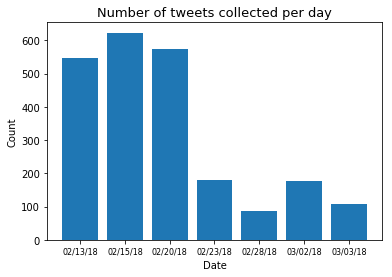

In [13]:
from collections import Counter
import numpy as np

count=Counter(tweets_df["date"])
count.most_common()

x=[count.most_common()[k][0].strftime('%m/%d/%y') for k in range(len(count.most_common()))]
y=[count.most_common()[k][1] for k in range(len(count.most_common()))]

plt.figure()
plt.bar(x,y)
plt.title("Number of tweets collected per day", size=13)
plt.xticks(size=8)
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [14]:
for k in tweets_df.index:
    try:
        tweets_df.loc[k,'country']=tweets_df.loc[k,"place"]['country']
    except:
        TypeError

print('Country name is known for {} % of tweets in the dataset'.format(len(tweets_df[tweets_df['country'].notnull()])/len(tweets_df)))

Country name is known for 0.03308663474096648 % of tweets in the dataset


In [15]:
#this is depressing but let's still have fun and visualize it on Tableau

tweets_df.to_csv('tweets_df__tableau.csv', sep='\t')

![Number of tweets per country (limited sample)](tableau tweets.jpg)


# 4. Word Tokenization

In [16]:
import itertools
import nltk
import string


In [17]:
with open("alltweets_.txt", errors="ignore") as handle:
    text = handle.read()

In [18]:
text = text.replace('\n', ' ')
text[0:100]

'Who won Team Canada’s 29 medals in PyeongChang?  Swedish Winter Olympics ratings fall in snow  Top international performances from PyeongChang 2018  @SenGillibrand My nickname is Tank   I been playing Special Olympics 17 years   I play 6 sports   Softball basketball volleyball track bocce golf    Can you Follow me and ask your Twitters friends to follow me :) Team Canada’s most memorable moments from PyeongChang 2018  Olympics: Figureskating - Virtue and Moir continue to shine on second comi  #martialarts #2snapchat @silewconsulting @Aly_Dodge @Olympics More like an upside-down turtle 2018 Winter #Olympics Close Out as Least-Watched on Record, Down 7% From Sochi Games   Team Canada supporting one another at PyeongChang 2018  Proud of this program and your constant willingness to volunteer and lend spirit and support to any event. Unfortunately, the Special Olympics have been cancelled. Thank you for the hard work already put in and for all of those that you are willing to lift up. #AL

In [19]:
tokens = nltk.word_tokenize(text)


In [21]:
from collections import Counter

words = Counter(tokens)
words.most_common(20)

[('#', 1700),
 ('the', 1464),
 ('Olympics', 1365),
 ('.', 1059),
 ('@', 1053),
 (',', 850),
 ('to', 672),
 ('in', 533),
 ('!', 513),
 ('Winter', 490),
 ('and', 463),
 ('of', 462),
 (':', 453),
 ('a', 442),
 ('I', 361),
 ('is', 360),
 ('’', 346),
 ('for', 341),
 ('at', 338),
 ("'s", 309)]

### Removing punctuation


In [22]:
#We use the function remove_punct defined in class notebooks in order to remove the punctuations from our tokens
#

import string
punctuation = string.punctuation

def remove_punct(wordlist):
    return [word for word in wordlist if word not in punctuation]

no_punct=remove_punct(tokens)

no_punct[:20]

['Who',
 'won',
 'Team',
 'Canada',
 '’',
 's',
 '29',
 'medals',
 'in',
 'PyeongChang',
 'Swedish',
 'Winter',
 'Olympics',
 'ratings',
 'fall',
 'in',
 'snow',
 'Top',
 'international',
 'performances']

In [23]:
def print_most_common(filename, count=10):
   
    from collections import Counter
    text = None
    mycounts = None
    
    try:
        with open(filename, errors="ignore") as handle:
            text = handle.read()
            text = text.replace("\n", " ")
            words = nltk.word_tokenize(text)
            
            print("Total Length", len(words))
            words = remove_punct(words) 
            print("Total Length After Punct Removal", len(words))
            
            mycounts = Counter(words)
            print("Word\tCount")
            for word,count in mycounts.most_common(count):
                print("%s\t%s" % (word,count))
    except:
        print("Something is wrong with your file location.")

In [24]:
print_most_common("alltweets_.txt",30)

Total Length 43120
Total Length After Punct Removal 36327
Word	Count
the	1464
Olympics	1365
to	672
in	533
Winter	490
and	463
of	462
a	442
I	361
is	360
’	346
for	341
at	338
's	309
on	259
The	249
you	207
2018	203
it	191
olympics	181
s	170
...	165
are	164
this	147
that	147
with	138
be	123
Olympic	120
from	119
Korea	119


### removing stopwords

In [25]:
#we use the nltk stopwords list and create a function to remove them from our wordlist

from nltk.corpus import stopwords

STOPS = stopwords.words('english')

def remove_stops(wordlist, stopwords):
    # takes a list of words and stopwords and filters out stopwords after lowercasing
    lowercase = [word.lower() for word in wordlist]
    return [word for word in lowercase if word not in stopwords]


In [26]:
#this is a list of stopwords we want to get rid of, as we don't want them to appear in the top occurrences. 
#We create a function to get rid of them

mywords = ['\'s', '\'', '...', '``', '\'\'', 'n\'t', '\'', '2']

def remove_custom(wordlist, mylist):
    return [word for word in wordlist if word not in mylist]

In [27]:
#using the updated function to print most common words after removing punctuation, nltk stopwords and custom stopwords

def print_most_common_2(filename,count=10):
    # Takes a path to a file, splits it up into tokens, and prints the "count" most common.
    # This version removes punctuation.
    from collections import Counter
    text = None
    mycounts = None
    try:
        with open(filename, errors="ignore") as handle:
            text = handle.read()
            text = text.replace("\n", " ")
            words = nltk.word_tokenize(text)
            
            print("Length Before Cleaning", len(words))
            words = remove_punct(words)
            words = remove_stops(words,STOPS)
            words = remove_custom(words, mywords)
            print("Length After Cleaning", len(words))
            
            mycounts = Counter(words)
            print("Word\tCount")
            for word,count in mycounts.most_common(count):
                print("%s\t%s" % (word,count))
    except:
        print("Something is wrong with your file location.")
        
    


In [28]:
print_most_common_2('alltweets_.txt', 50)


Length Before Cleaning 43120
Length After Cleaning 22871
Word	Count
olympics	1575
winter	541
’	346
2018	203
pyeongchang	192
gold	131
olympic	124
korea	123
team	103
pyeongchang2018	95
via	92
amp	87
hockey	84
skating	82
watch	79
curling	78
games	75
like	70
south	69
athletes	68
medal	68
usa	64
canada	63
ice	62
great	61
love	61
women	61
time	60
men	59
north	58
medals	57
first	57
figure	57
day	55
news	54
would	53
watching	53
one	52
win	51
us	50
get	48
best	47
see	47
new	47
sports	46
world	46
good	44
ceremony	43
much	42
people	42


# 5. Most common Words and Bigrams

In [29]:
#we transform our .txt file into a list of cleaned tokens (no punct, no stops) thanks to mytools tokenize_text and clean_tokens functions
# and the remove_custom function 
#we're just going to define again clean_tokens as in the class notebooks because the function in nlp_utilities seems to have been
#defined differently (takes only one argument instead of two)

def clean_tokens(tokens, stopwords):
    words = remove_punct(tokens)
    words = remove_stops(words, stopwords)
    return words


tokens=mytools.tokenize_text('alltweets_.txt')
cleaned_tokens=clean_tokens(tokens, STOPS)
cleaned_tokens_2=remove_custom(cleaned_tokens, mywords)
cleaned_tokens_2[0:20]

['team',
 'canadas',
 '29',
 'medals',
 'pyeongchang',
 'swedish',
 'winter',
 'olympics',
 'ratings',
 'fall',
 'snow',
 'top',
 'international',
 'performances',
 'pyeongchang',
 '2018',
 'sengillibrand',
 'nickname',
 'tank',
 'playing']

In [30]:
from nltk.collocations import *

word_fd = nltk.FreqDist(cleaned_tokens_2) # all the words
most_common=word_fd.most_common(25)
most_common

[('olympics', 1563),
 ('winter', 537),
 ('2018', 203),
 ('pyeongchang', 190),
 ('gold', 131),
 ('olympic', 123),
 ('korea', 120),
 ('team', 102),
 ('pyeongchang2018', 95),
 ('via', 92),
 ('amp', 87),
 ('hockey', 84),
 ('skating', 81),
 ('watch', 80),
 ('curling', 78),
 ('games', 72),
 ('like', 70),
 ('south', 69),
 ('athletes', 68),
 ('medal', 66),
 ('usa', 63),
 ('canada', 61),
 ('great', 61),
 ('love', 61),
 ('ice', 61)]

In [31]:
d=[('words', [most_common[k][0] for k in range(len(most_common))]),
   ('counts', [most_common[k][1] for k in range(len(most_common))])]

most_common_df=pd.DataFrame.from_items(d)
most_common_df.set_index('words', inplace=True)
most_common_df

,counts
words,
olympics,1563
winter,537
2018,203
pyeongchang,190
gold,131
olympic,123
korea,120
team,102
pyeongchang2018,95


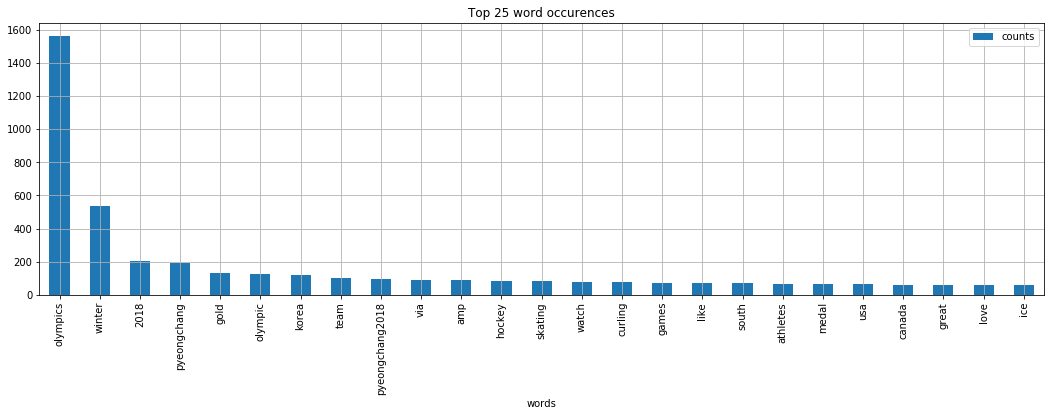

In [32]:
most_common_df.plot(kind='bar', figsize=(18,5), grid=True, title='Top 25 word occurences')

In [33]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

bigram_fd = nltk.FreqDist(nltk.bigrams(cleaned_tokens_2))
finder = BigramCollocationFinder(word_fd, bigram_fd)
scored = finder.score_ngrams(bigram_measures.likelihood_ratio) # a good option here, there are others:
most_common=scored[0:10]
most_common

[(('winter', 'olympics'), 2408.8204054160224),
 (('south', 'korea'), 611.3018575763041),
 (('figure', 'skating'), 404.81877010860757),
 (('elise', 'christie'), 338.7650565115781),
 (('closing', 'ceremony'), 289.3758734763876),
 (('shaun', 'white'), 279.34110682498806),
 (('2018', 'winter'), 257.3151303983929),
 (('pyeongchang', '2018'), 236.04173972712698),
 (('north', 'korea'), 230.9923028652286),
 (('love', 'valentinesday'), 205.68427276367254)]

In [34]:
d=[('bigrams', [most_common[k][0] for k in range(len(most_common))]),
   ('scores', [most_common[k][1] for k in range(len(most_common))])]

most_common_df=pd.DataFrame.from_items(d)
most_common_df.set_index('bigrams', inplace=True)
most_common_df

,scores
bigrams,
"(winter, olympics)",2408.820405
"(south, korea)",611.301858
"(figure, skating)",404.818770
"(elise, christie)",338.765057
"(closing, ceremony)",289.375873
"(shaun, white)",279.341107
"(2018, winter)",257.315130
"(pyeongchang, 2018)",236.041740
"(north, korea)",230.992303


### Wordclouds

In [35]:
# increasing the size of the figure drawn (width, height)
from pylab import rcParams
rcParams['figure.figsize'] = (15,11)

In [36]:
text = ' '.join(cleaned_tokens_2)

In [37]:
def make_word_cloud(text, stops=None):
    import wordcloud
    # you have to figure out a font path for your machine (sigh)
    myWordcloud = wordcloud.WordCloud(font_path="data/CaviarDreams.ttf", 
                                      stopwords=stops).generate(text)
    plt.imshow(myWordcloud)
    plt.axis("off")
    plt.show()

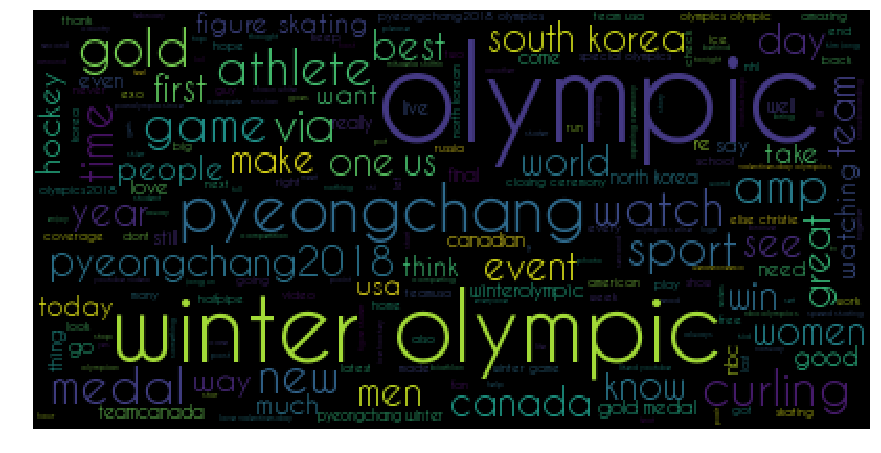

In [38]:
make_word_cloud(text)


### Just hashtags

In [39]:
with open("allhashtags_.txt", errors="ignore") as handle:
    text = handle.read()

text = text.replace('\n', ' ')
text[0:100]

'martialarts 2snapchat Olympics Olympics Olympics2018 trump Olympics Olympics2018 trump pens LetsGoPe'

In [40]:
tokens = nltk.word_tokenize(text)

In [41]:
from collections import Counter

hashtags = Counter(tokens)
most_common=hashtags.most_common(10)
most_common

[('Olympics', 130),
 ('olympics', 26),
 ('PyeongChang2018', 26),
 ('WinterOlympics', 14),
 ('love', 12),
 ('ValentinesDay', 11),
 ('TeamCanada', 10),
 ('Olympics2018', 7),
 ('iHeartAwards', 7),
 ('BestFanArmy', 7)]

In [42]:
d=[('hashtags', [most_common[k][0] for k in range(len(most_common))]),
   ('counts', [most_common[k][1] for k in range(len(most_common))])]

most_common_df=pd.DataFrame.from_items(d)
most_common_df.set_index('hashtags', inplace=True)
most_common_df

,counts
hashtags,
Olympics,130
olympics,26
PyeongChang2018,26
WinterOlympics,14
love,12
ValentinesDay,11
TeamCanada,10
Olympics2018,7
iHeartAwards,7


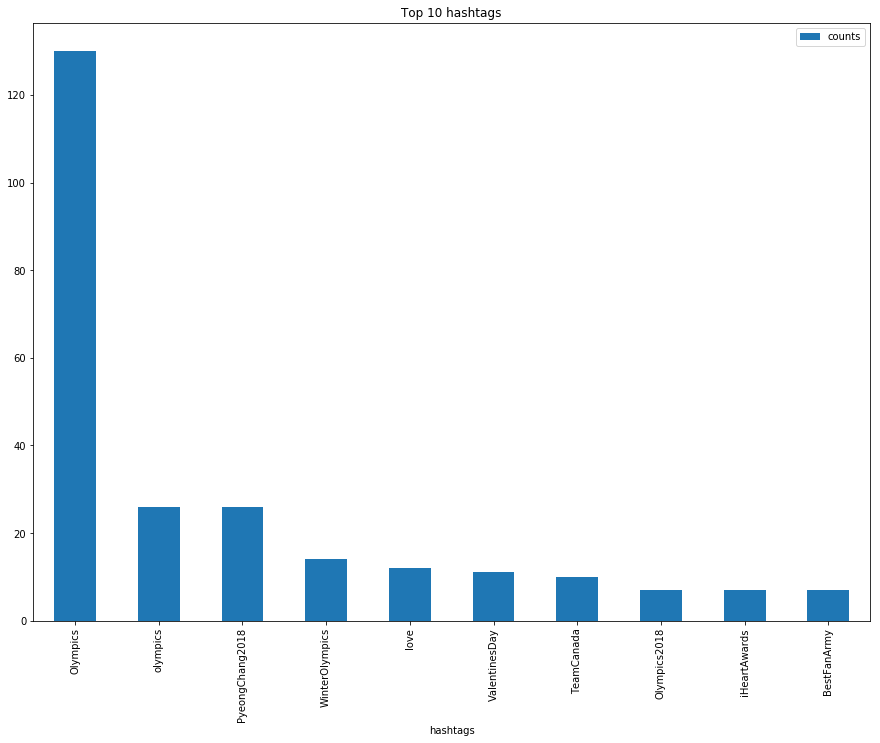

In [43]:
most_common_df.plot(kind='bar', title='Top 10 hashtags')

### Sentence Tokenization?

In [44]:
with open("alltweets_.txt", errors="ignore") as handle:
    text = handle.read()


text[0:100]


'Who won Team Canada’s 29 medals in PyeongChang? \nSwedish Winter Olympics ratings fall in snow\n\nTop i'

In [45]:
sentences = nltk.sent_tokenize(text)
sentences[0:10]


['Who won Team Canada’s 29 medals in PyeongChang?',
 'Swedish Winter Olympics ratings fall in snow\n\nTop international performances from PyeongChang 2018 \n@SenGillibrand My nickname is Tank \n\nI been playing Special Olympics 17 years \n\nI play 6 sports \n\nSoftball basketball volleyball track bocce golf  \n\nCan you Follow me and ask your Twitters friends to follow me :)\nTeam Canada’s most memorable moments from PyeongChang 2018 \nOlympics: Figureskating - Virtue and Moir continue to shine on second comi  #martialarts #2snapchat @silewconsulting\n@Aly_Dodge @Olympics More like an upside-down turtle\n2018 Winter #Olympics Close Out as Least-Watched on Record, Down 7% From Sochi Games  \nTeam Canada supporting one another at PyeongChang 2018 \nProud of this program and your constant willingness to volunteer and lend spirit and support to any event.',
 'Unfortunately, the Special Olympics have been cancelled.',
 'Thank you for the hard work already put in and for all of those that yo

In [46]:
from collections import Counter

sent = Counter(sentences)
sent.most_common(12)

[('.', 4),
 ('(B00-Hoo!)', 4),
 ('Help expand it!', 3),
 ('But Who Pays for the Rights?', 3),
 ('I am designing Logo, Flyer, Label, Brochure, PDF, PDF editing, Packaging, Business card, info-graphics, Image illustration, Image tracing,  and Poster.',
  2),
 ("Did the NHL kill men's ice hockey at the Winter Olympics?", 2),
 ('Don’t fucking come at what EXO did, we can go on and on to shut your fucking mouths.',
  2),
 ('Congratulations!', 2),
 ('At the OLYMPICS.', 2),
 ('USA!', 2),
 ('The Olympics have come to Creston School!', 2),
 ('Currently, the U.S. has 12 medals here in South Korea through 11 days of competition.',
  2)]

## 6.Term Frequencies and Clustering

In [52]:
#.txt files were created manually in order to "a" (append) instead of "w'

for k in tweets_df.index:
    i=int(str(tweets_df['date'][k]).replace('-',''))
    
    file = open("tweets_\Tweet_text\Tweets_{}.txt".format(i), "a")
   
    try:   
        file.write(tweets_df.loc[k, 'text'] + '\n')
    except:
        UnicodeEncodeError
   

In [54]:
posfiles = mytools.get_filenames("tweets_\Tweet_text")
texts = mytools.load_texts_as_string(posfiles)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, tokenizer=mytools.tokenize_clean)

# this applies the vectorizer we defined to the texts!
tfidf_matrix = tfidf_vectorizer.fit_transform(texts.values()) #fit the vectorizer to texts

print(tfidf_matrix.shape) # this is the size of the array of features, rows and columns.

(7, 1715)


In [55]:
features = tfidf_vectorizer.get_feature_names()
features[0:10]

["'d",
 "'ll",
 "'re",
 '*not*',
 '..not',
 '1st',
 '2018winterolympics',
 '23rd',
 '2nd',
 '3dprinting']

In [56]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    import pandas as pd
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [57]:
for k in range(tfidf_matrix.shape[0]):
    print()
    print("top tfidf features in document {}".format(posfiles[k]))
    print()
    print(top_feats_in_doc(tfidf_matrix, features, k , top_n=5))


top tfidf features in document tweets_\Tweet_text/Tweets_20180213.txt

    feature     tfidf
0       kim  0.177075
1   opening  0.149116
2      u.s.  0.148950
3  halfpipe  0.134797
4        tv  0.130476

top tfidf features in document tweets_\Tweet_text/Tweets_20180215.txt

       feature     tfidf
0         luge  0.200373
1       canada  0.190487
2  incredibles  0.152372
3     shiffrin  0.150280
4         wins  0.147871

top tfidf features in document tweets_\Tweet_text/Tweets_20180220.txt

    feature     tfidf
0   curling  0.204178
1       usa  0.187844
2     elise  0.167823
3  christie  0.167823
4     women  0.130674

top tfidf features in document tweets_\Tweet_text/Tweets_20180223.txt

   feature     tfidf
0  curling  0.390645
1   ivanka  0.321032
2    women  0.260430
3  arrives  0.250386
4  closing  0.244153

top tfidf features in document tweets_\Tweet_text/Tweets_20180228.txt

   feature     tfidf
0  closing  0.221296
1  perform  0.151578
2    marks  0.136167
3     late  0.13

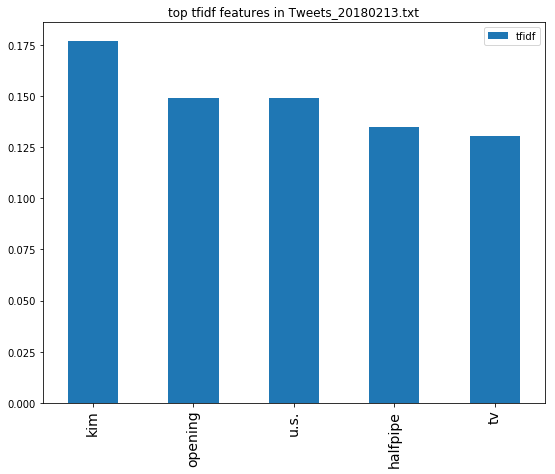

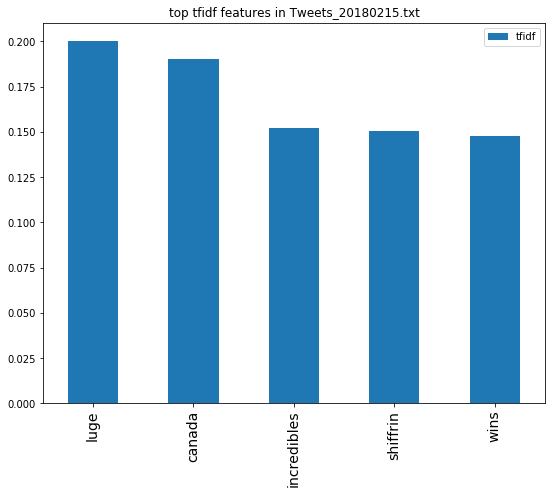

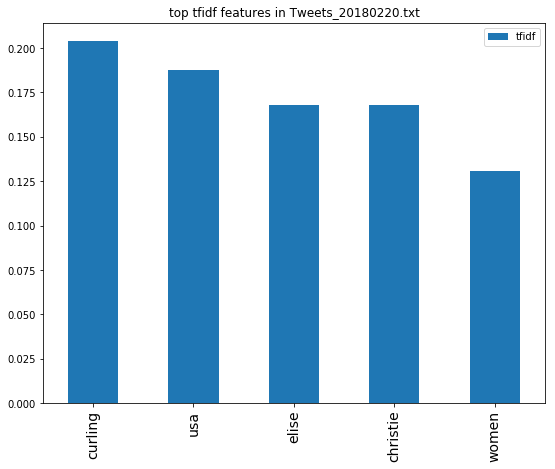

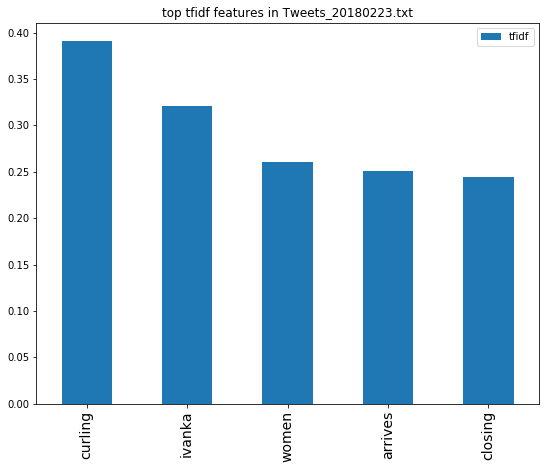

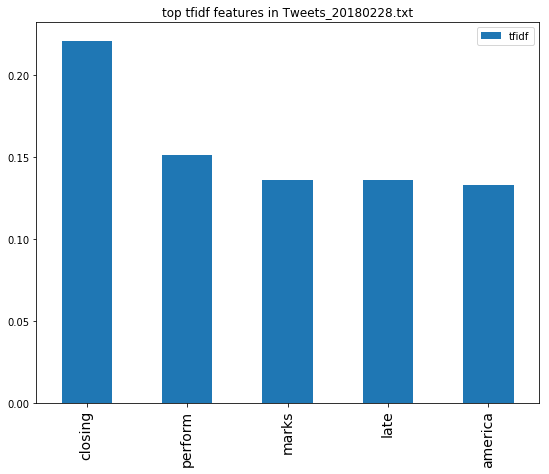

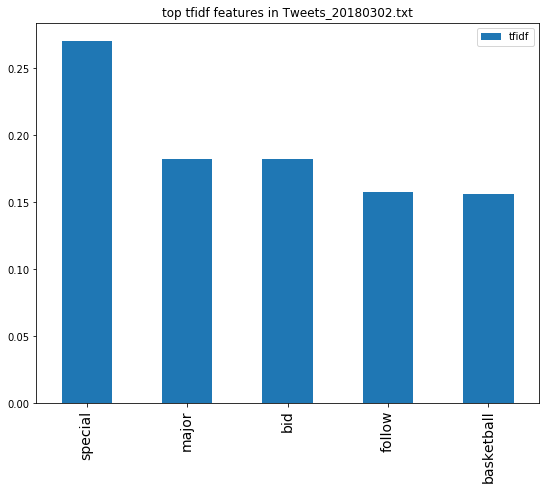

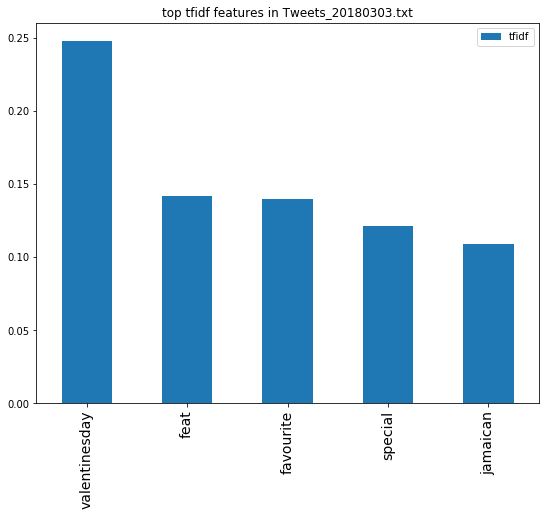

In [59]:
for k in range(tfidf_matrix.shape[0]):
    df=top_feats_in_doc(tfidf_matrix, features, k , top_n=5)
    df.set_index('feature', inplace=True)
    df.plot.bar(title="top tfidf features in {}".format(posfiles[k][-19:]), figsize=(9,7))
    plt.xticks(size=14)
    plt.xlabel('')

In [60]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

top_mean_feats(tfidf_matrix, features, top_n=10)

,feature,tfidf
0,curling,0.100951
1,women,0.075465
2,special,0.074595
3,closing,0.066493
4,usa,0.062890
5,canada,0.052790
6,ivanka,0.045862
7,new,0.036901
8,wins,0.036323
9,arrives,0.035769


# Hierarchical clustering


In [61]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

def get_distance(text1,text2, vectorizer):
    tfidf = vectorizer.fit_transform([text1, text2])
    vectors = tfidf.toarray()
    dist = pdist(vectors, metric='cosine')
    return dist

myvectorizer = TfidfVectorizer(tokenizer=mytools.tokenize_clean)  # use our own tokenize and clean



In [62]:
tfidf = TfidfVectorizer(tokenizer=mytools.tokenize_clean_stem).fit_transform(texts.values())
vectors = tfidf.toarray()
vectors

array([[ 0.00482043,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00447584,  0.        , ...,  0.00447584,
         0.00447584,  0.00447584],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
def make_dend(data, method='ward', labels=None, height=8):
    from pylab import rcParams
    dist = pdist(data, metric='cosine')
    link = linkage(dist, method=method)
    rcParams['figure.figsize'] = 6, height
    rcParams['axes.labelsize'] = 5
    if not labels:
        dend = dendrogram(link, orientation='right') #labels=names)
    else:
        # the label is actually the file + it's number in the list. See notes below on enumerate.
        dend = dendrogram(link, orientation='right', labels=[str(i) + '_' + label for i, label in enumerate(labels)])
    return dist

def clean_filenames(paths):
    # Makes labels that are just the root filename, no path part, and minus .txt
    import os
    return [os.path.basename(path).strip(".txt") for path in paths]

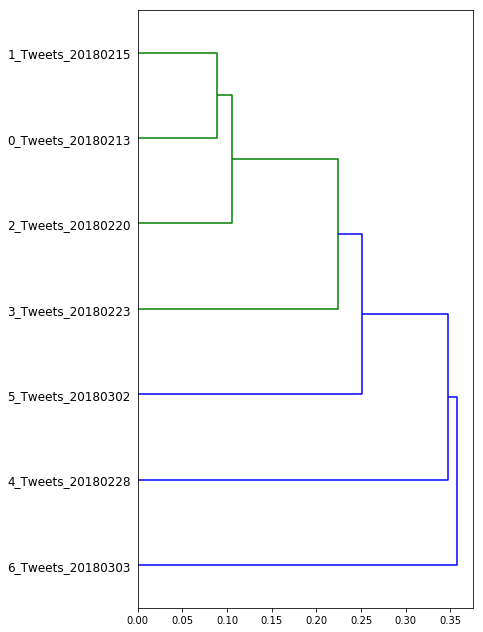

In [64]:
dist = make_dend(vectors, method='ward', height=11, labels=clean_filenames(texts.keys()))


# 7. Sentiment Counting

### Simple

In [65]:
import csv
import json
import nltk
import matplotlib.pyplot as plt
import pandas as pd

import nlp_utilities as mytools
import get_sentiment_chunks as chunks

Let's load the positive and negative word lists stores in our data files. We use the load_words function defined in class to tokenize the word lists. 
We then use the get_sentiment_counts* function in order to get the number and details of positive and negative words for each tokenized .txt file.

(*) The version I'll use is from one of the textbooks, different from the one in get_sentiments_chunks.py. I don't want it to return the text in the dict though. The get_overlap function is taken from get_sentiment_chunks

In [66]:
NEGWORDS = "data/sentiment_wordlists/negative-words.txt"
POSWORDS = "data/sentiment_wordlists/positive-words.txt"

In [67]:
negwords = chunks.load_words(NEGWORDS)
poswords = chunks.load_words(POSWORDS)

In [68]:
negwords[0:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [74]:
posfiles = mytools.get_filenames("tweets_\Tweet_Text")

In [75]:
def get_sentiment_counts(text, filename="None", poswords=poswords, negwords=negwords):
    """This takes a text, a filename, and sentiment polarity wordlists and counts for you.
    (The filename is just for a field in the dictionary.)
    Returns a dictionary.
    """
    from collections import Counter
    count = dict()
    overlap_pos = chunks.get_overlap(text, poswords)
    overlap_neg = chunks.get_overlap(text, negwords)
    count = {
            "file": filename,
            "positive_total": int(sum(Counter(dict(overlap_pos)).values())),
            "positive_words": list(overlap_pos),
            "negative_total": int(sum(Counter(dict(overlap_neg)).values())),
            "negative_words": list(overlap_neg),
            "word_count": int(len(text)),
        }
    count['net_score'] = count['positive_total'] - count['negative_total']
    return count


In [76]:
sentiments=[]
for file in posfiles:
    tokens = mytools.tokenize_text(file)
    tokens = mytools.clean_tokens(tokens)
    sentiments.append(get_sentiment_counts(tokens, file))

In [77]:
sentiments[0]

{'file': 'tweets_\\Tweet_Text/Tweets_20180213.txt',
 'negative_total': 198,
 'negative_words': [('destroyer', 5),
  ('punch', 1),
  ('moody', 1),
  ('racist', 3),
  ('worse', 1),
  ('cheated', 1),
  ('dirty', 1),
  ('mushy', 1),
  ('falling', 1),
  ('strange', 1),
  ('attack', 3),
  ('harm', 1),
  ('underdog', 1),
  ('sick', 3),
  ('ashamed', 1),
  ('loses', 1),
  ('crashing', 1),
  ('utterly', 1),
  ('shameless', 1),
  ('evil', 2),
  ('gruesome', 1),
  ('injury', 1),
  ('grumpy', 1),
  ('exhausted', 1),
  ('break', 1),
  ('smash', 1),
  ('confused', 2),
  ('sad', 1),
  ('bloody', 1),
  ('dead', 1),
  ('hypocrisy', 2),
  ('louder', 2),
  ('bad', 1),
  ('cold', 2),
  ('wild', 2),
  ('crashes', 2),
  ('bullshit', 3),
  ('freeze', 4),
  ('fail', 3),
  ('wrong', 1),
  ('dumb', 2),
  ('fall', 1),
  ('pity', 1),
  ('procrastination', 1),
  ('damn', 4),
  ('overshadow', 1),
  ('distraction', 2),
  ('unsavory', 1),
  ('sour', 1),
  ('hard', 3),
  ('killing', 2),
  ('controversy', 1),
  ('warni

Let's try to plot the count of positive and negative words for each doc

In [78]:
pos_totals=[]
neg_totals=[]

for k in range(len(sentiments)):
    pos_totals.append(sentiments[k]["positive_total"])
    neg_totals.append(sentiments[k]["negative_total"])

In [79]:
pos_totals

[295, 406, 376, 124, 35, 129, 70]

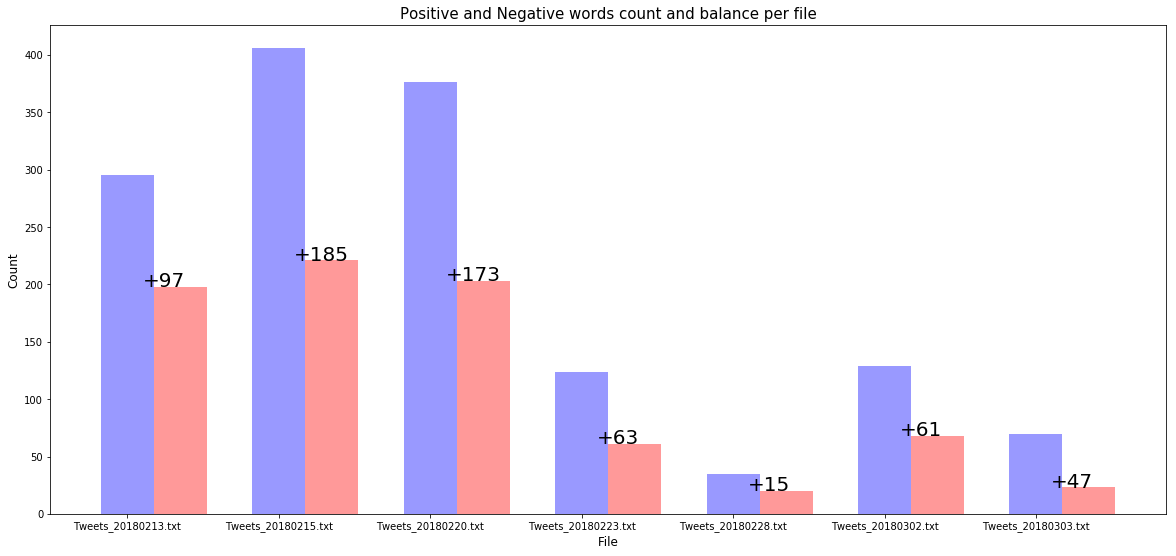

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20,9))


index=np.arange(len(sentiments))
bar_width=0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, pos_totals, bar_width,
                alpha=opacity, color='b',
                label='Pos')

rects2=  ax.bar(index + bar_width, neg_totals, bar_width,
                alpha=opacity, color='r',
                label='Neg')

ax.set_title('Positive and Negative words count and balance per file', size=15)
ax.set_xlabel('File', size=12)
ax.set_ylabel('Count', size=12)
ax.set_xticklabels([0]+[posfiles[k][-19:] for k in range(len(posfiles))]) #don't know why the first index won't show

for k in range((len(posfiles))):
    plt.text(k+0.1, neg_totals[k], '+{}'.format(pos_totals[k]-neg_totals[k]), size=20)



plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

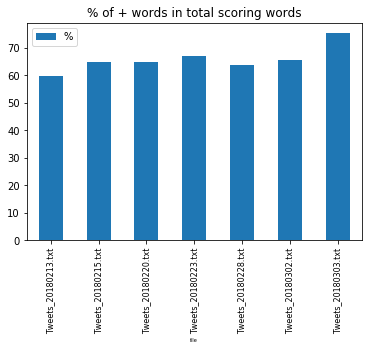

In [81]:
d=[('%', [100 * pos_totals[k]/(pos_totals[k]+neg_totals[k]) for k in range(len(pos_totals))]),
 ('file', [posfiles[k][-19:] for k in range(len(posfiles))])]
balance=pd.DataFrame.from_items(d)
balance.set_index('file', inplace=True)
balance.plot(kind='bar', title="% of + words in total scoring words", figsize=(6,4))
plt.xticks(size=8)

### Using AFINN

In [82]:
def load_afinn(filepath):
    """ Returns a dictionary with word as key, score as value"""
    from collections import defaultdict
    scores = defaultdict(int)
    with open(filepath) as handle:
        lines = handle.readlines()
        for line in lines:
            words = line.split('\t')
            scores[words[0]] = int(words[1])
    return scores

In [83]:
afinn = load_afinn("data/sentiment_wordlists/AFINN-111.txt")


In [84]:
afinn_per_token=[]
for file in posfiles:
    with open(file, errors="ignore") as handle:
        text = handle.read()
        score = 0
        tokens = nltk.word_tokenize(text)
        for token in tokens:
            try:
                score = score + afinn[token]
            except KeyError:
                continue
        
        print("{} \n \n Result:".format(file), score)
        print("Result/number of tokens:", round(score/len(tokens), 3))
        afinn_per_token.append(round(score/len(tokens), 3))
        print()

tweets_\Tweet_Text/Tweets_20180213.txt 
 
 Result: 262
Result/number of tokens: 0.028

tweets_\Tweet_Text/Tweets_20180215.txt 
 
 Result: 370
Result/number of tokens: 0.032

tweets_\Tweet_Text/Tweets_20180220.txt 
 
 Result: 353
Result/number of tokens: 0.03

tweets_\Tweet_Text/Tweets_20180223.txt 
 
 Result: 92
Result/number of tokens: 0.03

tweets_\Tweet_Text/Tweets_20180228.txt 
 
 Result: 27
Result/number of tokens: 0.021

tweets_\Tweet_Text/Tweets_20180302.txt 
 
 Result: 157
Result/number of tokens: 0.042

tweets_\Tweet_Text/Tweets_20180303.txt 
 
 Result: 103
Result/number of tokens: 0.05



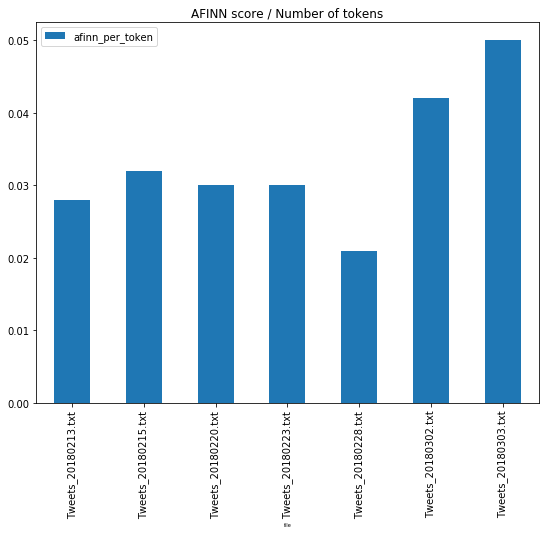

In [86]:
d=[('afinn_per_token',afinn_per_token),
  ('file', [posfiles[k][-19:] for k in range(len(posfiles))])]
afinn_df=pd.DataFrame.from_items(d)
afinn_df.set_index('file', inplace=True)
afinn_df.plot(kind='bar', title='AFINN score / Number of tokens', figsize=(9,7))

### Sentiment over time

  Let's use our "all tweets" .txt file again for that. 
  In Anaconda Prompt, we run the following:
  
  
  python get_sentiment_chunks.py alltweets_.txt 250



In [87]:
df = pd.read_json("sentiment.json")

In [88]:
df.head()


,index,neg,negwords,netpos,pos,poswords,words
0,0,5,"[[fall, 1], [tank, 1], [unfortunately, 1], [ha...",13,18,"[[won, 1], [top, 1], [memorable, 1], [virtue, ...",250
1,1,5,"[[crushing, 1], [fall, 1], [lost, 1], [idiots,...",1,6,"[[celebrate, 1], [quicker, 1], [best, 1], [fea...",250
2,2,7,"[[bankrupt, 1], [debts, 2], [funny, 1], [offen...",-1,6,"[[benefit, 1], [glamorous, 1], [hottest, 1], [...",250
3,3,5,"[[drones, 1], [break, 1], [sad, 1], [tank, 1],...",3,8,"[[free, 1], [loved, 1], [excited, 1], [thank, ...",250
4,4,3,"[[wild, 1], [exhaust, 1], [failing, 1]]",10,13,"[[fans, 1], [gold, 3], [rich, 1], [perfect, 1]...",250


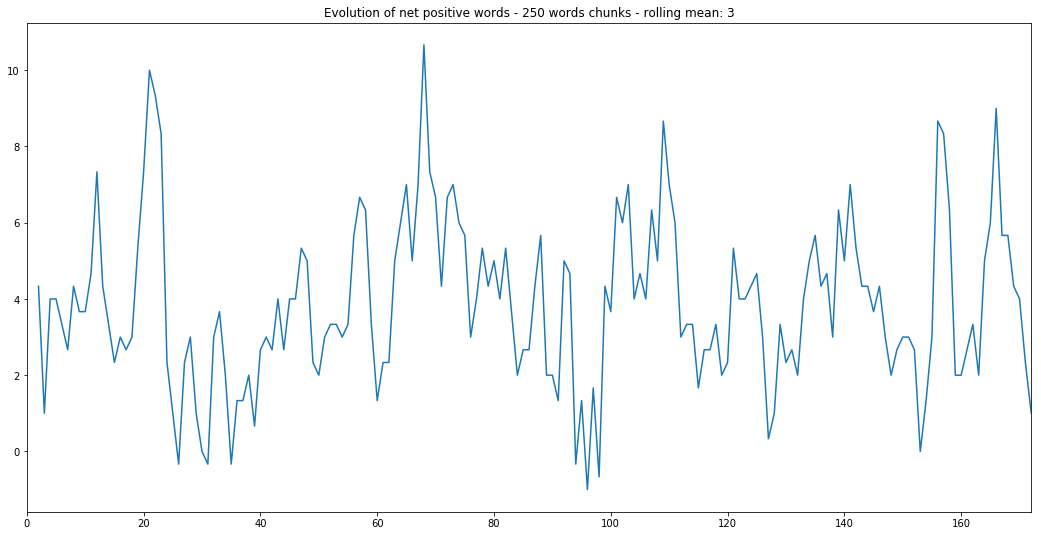

In [89]:
df['netpos'].rolling(window=3).mean().plot(figsize=(18,9), title="Evolution of net positive words - 250 words chunks - rolling mean: 3") 


We might want to look at the chunks with highest and lowest score

In [90]:
df=df.sort_values(by=["netpos"], ascending=False)

top_net_pos=df.head(5)
top_net_pos

,index,neg,negwords,netpos,pos,poswords,words
0,0,5,"[[fall, 1], [tank, 1], [unfortunately, 1], [ha...",13,18,"[[won, 1], [top, 1], [memorable, 1], [virtue, ...",250
21,21,2,"[[crazy, 1], [stuck, 1]]",13,15,"[[best, 1], [worth, 1], [like, 1], [talents, 1...",250
68,68,2,"[[error, 1], [lone, 1]]",13,15,"[[winners, 1], [well, 3], [great, 1], [free, 2...",250
67,67,4,"[[hate, 1], [fuck, 1], [problem, 1], [cold, 1]]",13,17,"[[incredible, 1], [great, 1], [wins, 2], [gold...",250
164,164,2,"[[impossible, 1], [hopelessness, 1]]",13,15,"[[trump, 5], [best, 1], [gold, 2], [likes, 1],...",250


In [91]:
low_net_pos=df.tail(5)
low_net_pos

,index,neg,negwords,netpos,pos,poswords,words
69,69,10,"[[shit, 1], [tense, 1], [showdown, 1], [sorry,...",-4,6,"[[fascinating, 1], [exciting, 1], [nice, 1], [...",250
24,24,6,"[[moody, 1], [racist, 1], [worse, 1], [cheated...",-5,1,"[[good, 1]]",250
96,96,7,"[[died, 1], [harassment, 1], [missed, 1], [gar...",-5,2,"[[like, 2]]",250
94,94,11,"[[chill, 1], [disgusting, 1], [immature, 1], [...",-6,5,"[[awards, 1], [victory, 1], [pretty, 1], [supp...",250
89,89,11,"[[foul, 1], [wild, 1], [degenerate, 1], [disgr...",-8,3,"[[convincing, 1], [upbeat, 1], [classy, 1]]",250


In [92]:
#this returns the entire top 5 tokenized chunks for which the scores are highest and lowest. Tough to exploit though.

with open("alltweets_.txt", errors="ignore") as handle:
    text = handle.read()
    tokens = nltk.word_tokenize(text)

print("chunks with highest score")
print()
for k in top_net_pos.index:
    a=k*250
    b=(k+1)*250
    print(tokens[a:b])
    print()
    
    
print("chunks with lowest score")
print()    
for k in low_net_pos.index:
    a=k*250
    b=(k+1)*250
    print(tokens[a:b])
    print()

chunks with highest score

['Who', 'won', 'Team', 'Canada', '’', 's', '29', 'medals', 'in', 'PyeongChang', '?', 'Swedish', 'Winter', 'Olympics', 'ratings', 'fall', 'in', 'snow', 'Top', 'international', 'performances', 'from', 'PyeongChang', '2018', '@', 'SenGillibrand', 'My', 'nickname', 'is', 'Tank', 'I', 'been', 'playing', 'Special', 'Olympics', '17', 'years', 'I', 'play', '6', 'sports', 'Softball', 'basketball', 'volleyball', 'track', 'bocce', 'golf', 'Can', 'you', 'Follow', 'me', 'and', 'ask', 'your', 'Twitters', 'friends', 'to', 'follow', 'me', ':', ')', 'Team', 'Canada', '’', 's', 'most', 'memorable', 'moments', 'from', 'PyeongChang', '2018', 'Olympics', ':', 'Figureskating', '-', 'Virtue', 'and', 'Moir', 'continue', 'to', 'shine', 'on', 'second', 'comi', '#', 'martialarts', '#', '2snapchat', '@', 'silewconsulting', '@', 'Aly_Dodge', '@', 'Olympics', 'More', 'like', 'an', 'upside-down', 'turtle', '2018', 'Winter', '#', 'Olympics', 'Close', 'Out', 'as', 'Least-Watched', 'on', 'Rec

In [93]:
top_net_pos.index

Int64Index([0, 21, 68, 67, 164], dtype='int64')

In [94]:
#This prints the positive words in the top 5 most positive chunks and the negative words in the top 5 negative chunks,
#with scores for each word

print("Positive words in most positive chunks")
print()

for k in top_net_pos.index:
    print(df.loc[k, "poswords"])
    print()
    
print("Negative words in most negative chunks")
print()

for k in low_net_pos.index:
    print(df.loc[k, "negwords"])
    print()    

Positive words in most positive chunks

[['won', 1], ['top', 1], ['memorable', 1], ['virtue', 1], ['shine', 1], ['like', 1], ['supporting', 1], ['proud', 1], ['willingness', 1], ['support', 1], ['thank', 1], ['work', 1], ['willing', 1], ['trump', 2], ['great', 1], ['leads', 1], ['gold', 1]]

[['best', 1], ['worth', 1], ['like', 1], ['talents', 1], ['great', 1], ['love', 1], ['top', 1], ['champion', 1], ['win', 2], ['good', 1], ['fans', 1], ['masterpieces', 1], ['humble', 1], ['clean', 1]]

[['winners', 1], ['well', 3], ['great', 1], ['free', 2], ['easy', 1], ['good', 3], ['entertaining', 1], ['wins', 1], ['gold', 2]]

[['incredible', 1], ['great', 1], ['wins', 2], ['gold', 3], ['fantastic', 1], ['thank', 1], ['awesome', 1], ['inspiration', 1], ['win', 2], ['appropriate', 1], ['variety', 1], ['works', 1], ['finest', 1]]

[['trump', 5], ['best', 1], ['gold', 2], ['likes', 1], ['won', 1], ['victory', 1], ['pretty', 1], ['like', 1], ['glimmer', 1], ['grin', 1]]

Negative words in most nega

### Textblob



In [95]:
import numpy as np
from matplotlib import pyplot
import pandas as pd

from textblob import TextBlob

In [96]:
%matplotlib inline


In [97]:
def get_sent(row):
    # Take a row of the df, apply the sentiment function to the text, just get sentiment, and round it to 4 digits.
    return round(TextBlob(str(row['text'])).sentiment.polarity,3)



In [98]:
tweets_df=tweets_df.sort_values('timestamp_ms')
tweets_df=tweets_df.reset_index(drop=True)
tweets_df


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user,date,country
0,None,None,Tue Feb 13 11:19:51 +0000 2018,"[0, 49]","{'hashtags': [{'text': 'Olympics', 'indices': ...","{'media': [{'id': 963372137070305283, 'id_str'...",NaN,0,False,low,...,0,0,False,"<a href=""http://twitter.com/download/android"" ...",When your wife loves curling 5am wakeup #Olymp...,1518520791493,False,"{'id': 2869039826, 'id_str': '2869039826', 'na...",2018-02-13,NaN
1,None,None,Tue Feb 13 11:19:52 +0000 2018,NaN,"{'hashtags': [{'text': 'Destroyer', 'indices':...",NaN,NaN,0,False,low,...,0,0,False,"<a href=""http://www.apple.com/"" rel=""nofollow""...",Olympic #Destroyer Takes Aim At Winter #Olympi...,1518520792170,False,"{'id': 2478688363, 'id_str': '2478688363', 'na...",2018-02-13,NaN
2,None,None,Tue Feb 13 11:19:53 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Happy guys here. This is the fi...,0,False,low,...,0,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Happy guys here. This is the first alpine skii...,1518520793089,True,"{'id': 410926164, 'id_str': '410926164', 'name...",2018-02-13,NaN
3,None,None,Tue Feb 13 11:19:57 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,0,0,False,"<a href=""http://www.facebook.com/twitter"" rel=...",'Olympic Destroyer' malware targeted Pyeongcha...,1518520797947,False,"{'id': 1932131, 'id_str': '1932131', 'name': '...",2018-02-13,NaN
4,None,None,Tue Feb 13 11:19:58 +0000 2018,NaN,"{'hashtags': [{'text': 'OlympicClub', 'indices...",NaN,{'full_text': 'I just redeemed Canadian #Olymp...,0,False,low,...,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",I just redeemed Canadian #OlympicClub fan rewa...,1518520798944,True,"{'id': 888473824651493377, 'id_str': '88847382...",2018-02-13,NaN
5,None,None,Tue Feb 13 11:19:59 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'I'm glad we have a person with ...,0,False,low,...,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",I'm glad we have a person with a good head on ...,1518520799497,True,"{'id': 547930103, 'id_str': '547930103', 'name...",2018-02-13,NaN
6,None,None,Tue Feb 13 11:19:59 +0000 2018,"[0, 140]","{'hashtags': [{'text': 'Olympics', 'indices': ...",NaN,{'full_text': 'North Korean leader Kim Jong Un...,0,False,low,...,0,0,False,"<a href=""https://www.sprinklr.com"" rel=""nofoll...","North Korean leader Kim Jong Un lauds ""climate...",1518520799603,True,"{'id': 15012486, 'id_str': '15012486', 'name':...",2018-02-13,NaN
7,None,None,Tue Feb 13 11:19:59 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Is there girlfriend olympics ??,1518520799909,False,"{'id': 69572298, 'id_str': '69572298', 'name':...",2018-02-13,NaN
8,None,None,Tue Feb 13 11:20:00 +0000 2018,"[0, 32]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Fully thought this was @tommyd98,1518520800679,False,"{'id': 930232449954705409, 'id_str': '93023244...",2018-02-13,NaN
9,None,None,Tue Feb 13 11:20:00 +0000 2018,NaN,"{'hashtags': [{'text': 'WinterOlympics', 'indi...",NaN,NaN,0,False,low,...,0,0,False,"<a href=""https://about.twitter.com/products/tw...",Christie books her place in the final with a s...,1518520800883,False,"{'id': 107379222, 'id_str': '107379222', 'name...",2018-02-13,NaN


In [99]:
tweets_df['TBSentiment'] = tweets_df.apply(get_sent, axis=1)


Text(0,0.5,'score')

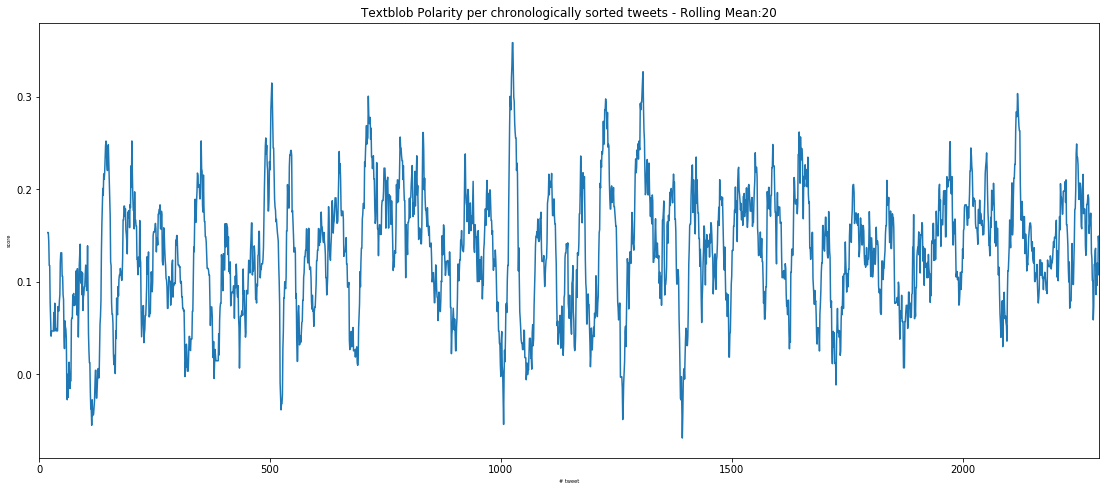

In [100]:
tweets_df['TBSentiment'].rolling(window=20).mean().plot(figsize=(19,8), title='Textblob Polarity per chronologically sorted tweets - Rolling Mean:20')
plt.xlabel('# tweet')
plt.ylabel('score')

In [102]:
tweets_df.index = tweets_df['created_at']


In [103]:
tweets_df.index = pd.to_datetime(tweets_df.index, yearfirst=True,errors='coerce')   

In [104]:
tweets_df.index.strftime('%D')   

array(['02/13/18', '02/13/18', '02/13/18', ..., '03/03/18', '03/03/18',
       '03/03/18'],
      dtype='<U8')

Text(0,0.5,'score')

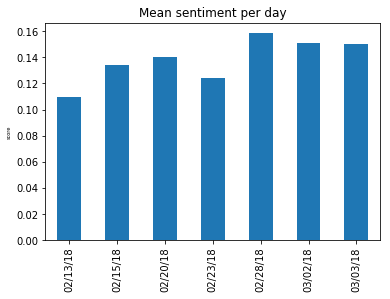

In [105]:
tweets_df.groupby(tweets_df.index.strftime('%D')).aggregate(np.mean)['TBSentiment'].plot( kind='bar', title="Mean sentiment per day")
plt.ylabel('score')

### NLTK sentiment tools  

In [106]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [107]:
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(sentence, analyzer):
    #Pass in the setence to be analysed and the analyzer, e.g., sid.
    #Returns a dictionary of the scores.
    ss = analyzer.polarity_scores(sentence)
    return ss

def get_nltk_sent(row):
    # Take a row of the df, apply the nltk sentiment vader function to the text,get the "compound".
    return get_vader_sentiment(str(row['text']), sid)['compound']

In [108]:
tweets_df=tweets_df.reset_index(drop=True)


In [109]:
tweets_df.sort_values(by='timestamp_ms')
tweets_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweet_count,retweeted,source,text,timestamp_ms,truncated,user,date,country,TBSentiment
0,None,None,Tue Feb 13 11:19:51 +0000 2018,"[0, 49]","{'hashtags': [{'text': 'Olympics', 'indices': ...","{'media': [{'id': 963372137070305283, 'id_str'...",NaN,0,False,low,...,0,False,"<a href=""http://twitter.com/download/android"" ...",When your wife loves curling 5am wakeup #Olymp...,1518520791493,False,"{'id': 2869039826, 'id_str': '2869039826', 'na...",2018-02-13,NaN,0.000
1,None,None,Tue Feb 13 11:19:52 +0000 2018,NaN,"{'hashtags': [{'text': 'Destroyer', 'indices':...",NaN,NaN,0,False,low,...,0,False,"<a href=""http://www.apple.com/"" rel=""nofollow""...",Olympic #Destroyer Takes Aim At Winter #Olympi...,1518520792170,False,"{'id': 2478688363, 'id_str': '2478688363', 'na...",2018-02-13,NaN,0.000
2,None,None,Tue Feb 13 11:19:53 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Happy guys here. This is the fi...,0,False,low,...,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Happy guys here. This is the first alpine skii...,1518520793089,True,"{'id': 410926164, 'id_str': '410926164', 'name...",2018-02-13,NaN,0.556
3,None,None,Tue Feb 13 11:19:57 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,0,False,"<a href=""http://www.facebook.com/twitter"" rel=...",'Olympic Destroyer' malware targeted Pyeongcha...,1518520797947,False,"{'id': 1932131, 'id_str': '1932131', 'name': '...",2018-02-13,NaN,0.000
4,None,None,Tue Feb 13 11:19:58 +0000 2018,NaN,"{'hashtags': [{'text': 'OlympicClub', 'indices...",NaN,{'full_text': 'I just redeemed Canadian #Olymp...,0,False,low,...,0,False,"<a href=""http://twitter.com/download/iphone"" r...",I just redeemed Canadian #OlympicClub fan rewa...,1518520798944,True,"{'id': 888473824651493377, 'id_str': '88847382...",2018-02-13,NaN,0.800
5,None,None,Tue Feb 13 11:19:59 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'I'm glad we have a person with ...,0,False,low,...,0,False,"<a href=""http://twitter.com/download/iphone"" r...",I'm glad we have a person with a good head on ...,1518520799497,True,"{'id': 547930103, 'id_str': '547930103', 'name...",2018-02-13,NaN,0.328
6,None,None,Tue Feb 13 11:19:59 +0000 2018,"[0, 140]","{'hashtags': [{'text': 'Olympics', 'indices': ...",NaN,{'full_text': 'North Korean leader Kim Jong Un...,0,False,low,...,0,False,"<a href=""https://www.sprinklr.com"" rel=""nofoll...","North Korean leader Kim Jong Un lauds ""climate...",1518520799603,True,"{'id': 15012486, 'id_str': '15012486', 'name':...",2018-02-13,NaN,0.000
7,None,None,Tue Feb 13 11:19:59 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Is there girlfriend olympics ??,1518520799909,False,"{'id': 69572298, 'id_str': '69572298', 'name':...",2018-02-13,NaN,0.000
8,None,None,Tue Feb 13 11:20:00 +0000 2018,"[0, 32]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Fully thought this was @tommyd98,1518520800679,False,"{'id': 930232449954705409, 'id_str': '93023244...",2018-02-13,NaN,0.000
9,None,None,Tue Feb 13 11:20:00 +0000 2018,NaN,"{'hashtags': [{'text': 'WinterOlympics', 'indi...",NaN,NaN,0,False,low,...,0,False,"<a href=""https://about.twitter.com/products/tw...",Christie books her place in the final with a s...,1518520800883,False,"{'id': 107379222, 'id_str': '107379222', 'name...",2018-02-13,NaN,0.000


In [110]:
tweets_df['NLTKSentiment'] = tweets_df.apply(get_nltk_sent, axis=1)


Text(0,0.5,'score')

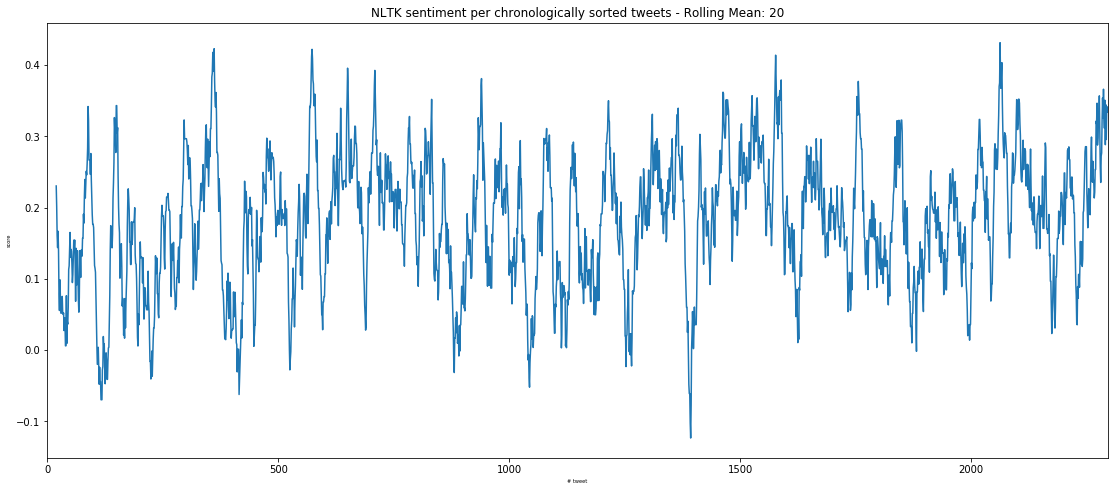

In [111]:
tweets_df['NLTKSentiment'].rolling(window=20).mean().plot(figsize=(19,8), title='NLTK sentiment per chronologically sorted tweets - Rolling Mean: 20')
plt.xlabel('# tweet')
plt.ylabel('score')

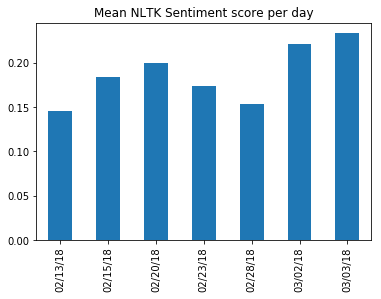

In [112]:
tweets_df.index = tweets_df['created_at']
tweets_df.index = pd.to_datetime(tweets_df.index, yearfirst=True,errors='coerce')
tweets_df.index.strftime('%D')   
tweets_df.groupby(tweets_df.index.strftime('%D')).aggregate(np.mean)['NLTKSentiment'].plot(kind='bar', title='Mean NLTK Sentiment score per day')

# 8. Topic Modelling

In [113]:
%matplotlib inline
import os
import re
import sys

import matplotlib.pylab as plt
import nltk
from nltk.tag import pos_tag
from gensim import corpora, models, similarities
import pandas as pd
import seaborn as sns

import nlp_utilities as mytools

STOPWORDS = nltk.corpus.stopwords.words('english')

C:\Users\arthurlegrix\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [114]:
posfiles = mytools.get_filenames("tweets_\Tweet_text")
texts = mytools.load_texts_as_string(posfiles)


In [115]:
tokenized_text = [mytools.tokenize_clean(value) for value in texts.values()]
sourcefilenames = [key for key in texts.keys()]

In [116]:
mywords = ['\'s', '\'', '...', '``', '\'\'', 'n\'t', '\'', '2']
tokenized_text=[mytools.remove_custom(tokens, mywords) for tokens in tokenized_text]

In [117]:
len(tokenized_text[2])

5864

In [118]:
NUMTOPICS = 3

dictionary = corpora.Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=1, no_above=0.8) # gensim
corpus = [dictionary.doc2bow(text) for text in tokenized_text]  # bag of words required for gensim operation
# our topic number NUMTOPICS goes in here:
lda = models.LdaModel(corpus, num_topics=NUMTOPICS, id2word=dictionary, update_every=5, chunksize=100, passes=10)
topics_matrix = lda.show_topics(formatted=False, num_words=10)

In [119]:
topics_matrix

[(0,
  [('kim', 0.0033957823),
   ('opening', 0.0028775055),
   ('usa', 0.0025311387),
   ('u.s.', 0.0025298491),
   ('tv', 0.0025242148),
   ('new', 0.002351156),
   ('final', 0.0023480777),
   ('curling', 0.0021821845),
   ('white', 0.0021734398),
   ('skater', 0.0021722158)]),
 (1,
  [('curling', 0.0051109637),
   ('canada', 0.0049622315),
   ('women', 0.0046928888),
   ('usa', 0.0030709107),
   ('luge', 0.002773698),
   ('wins', 0.0026384036),
   ('teamcanada', 0.0026319181),
   ('shiffrin', 0.0026284738),
   ('new', 0.0025191228),
   ('closing', 0.0024942828)]),
 (2,
  [('curling', 0.0032433644),
   ('special', 0.0032272125),
   ('usa', 0.0031312888),
   ('today', 0.0022466232),
   ('christie', 0.0020245216),
   ('women', 0.0020243803),
   ('elise', 0.0020228694),
   ('canada', 0.0019180075),
   ('every', 0.0019106873),
   ('valentinesday', 0.0019105722)])]

# 9. Named Entities Recognition using NLTK

In [120]:
import nltk
import nlp_utilities as mytools

In [121]:
with (open("alltweets_test_9.txt", errors="ignore")) as handle:
    sample = handle.read()

In [122]:
def extract_entity_names(tree):
    # code adapted from https://gist.github.com/onyxfish/322906
    entity_names = []
    if hasattr(tree, 'label') and tree.label:
        if tree.label() == 'NE':  # for "named entity"
            entity_names.append(' '.join([child[0] for child in tree]))
        else:
            for child in tree:
                entity_names.extend(extract_entity_names(child))
    return entity_names

In [123]:
sentences = nltk.sent_tokenize(sample)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)


In [124]:
entity_names = []
for sent in chunked_sentences:
    # Print results per sentence
    entities = extract_entity_names(sent)
    # Not all sentences have entities in them!
    if entities:
        print(entities)
    entity_names.extend(entities)   # extend means to add to the list end. http://thomas-cokelaer.info/blog/2011/03/post-2/

['Team Canada', 'PyeongChang']
['Swedish Winter', 'PyeongChang', 'Special', 'PyeongChang', 'Virtue', 'Record', 'Sochi Games Team', 'PyeongChang']
['ALLIN No']
['Great', 'Jagr', 'Czech']
['Team USA']
['LetsGoPens', 'Flashback', 'Hockey', 'Norway', 'GRAFFITI', 'OLYMPICS', 'DRONE', 'ATHENS', 'UNITEDPOWER', 'International Olympic Committee', 'Swedish Winter', 'SNL']
['Alec Baldwin']
['Monument', 'IDIOTS']
['Lithuania']
['Lithuania', 'USA']
['Levar Burton']
['WATCHOUT Apple', 'Best Way', 'Year', 'Slate Magazine Jojo']
['Wiz Khalifa', 'Clean', 'NFL Combine', 'NFL', 'PhinsUp', 'MISS', 'PyeongChang', 'NorwegianModesty', 'US']
['Greece']
['Brazil']
['GRAFFITI', 'OLYMPICS', 'DRONE', 'ATHENS', 'Boston Olympics']
['Special']
['Brian Gionta']
['Alexis Emma', 'Moldova']
['HiMyNameIsSeton', 'GOLDEN']
['Good']
['EXOL', 'Special', 'Winter Olympics', 'Diamond Slice', 'Figure Skating Fanatics', 'Beijing']
['Al Jazeera', 'Augmented Reality', 'Canadian', 'Brier2018', 'Wild Card']
['Accra Great', 'GFA', 'Bo

['Winter', 'Popular Skating Duo Pulls Off Historic Move At Winter Olympics']
['Sweden', 'Hanna Oberg']
['Rene Bourque', 'Wojtek Wolski', 'NHL']
['Enter']
['Germany', 'Simple']
['NHL', 'Tolvanen', 'Finland', 'Germany Professionalism']
['Winter', 'Pierre Vaultier']
['TeamBath', 'Pyeongchang Games Global', 'Winter Olympics', 'Kaitlyn Lawes', 'John Morris']
['US Winter', 'Fox News']
['CBC']
['Good']
['Winter Olympics', 'Mikaela Shiffrin', 'Free Rein Media Daily']
['Sweden', 'Hanna Oberg']
['PyeongChang2018']
['Winter Olympics']
['Business Journal', 'Canada', 'U.S.', 'Winter Olympics', 'Good Old Days', 'BBC4']
['Watch Canada', 'U.S.', 'KSoltisAnderson', 'Sorry']
['NICE North Korea']
['Zen', 'PyeongChang2018 Every', 'Yuri', 'ElaineVigneault', 'MMA']
['Sorry']
['ICYMI']
['Gold']
['WATCH', 'Oswego Student Media', 'North']
['Great', 'British Bake Off', 'Canada', 'Norway', 'ATAK', 'PORTAL']
['Great', 'HC_Men']
['Fast']
['GoCanadaGo', 'U.S.', 'Olympics Idiot']
['NBC']
['ScottMoir']
['Ranked If']


In [125]:
most_common=Counter(entity_names).most_common(20)
most_common

[('Pyeongchang', 55),
 ('South Korea', 50),
 ('PyeongChang', 37),
 ('Canada', 32),
 ('Winter Olympics', 30),
 ('Winter', 27),
 ('North Korea', 25),
 ('USA', 23),
 ('U.S.', 23),
 ('Korean', 21),
 ('Elise Christie', 21),
 ('Canadian', 20),
 ('NHL', 20),
 ('US', 19),
 ('Olympics', 19),
 ('PyeongChang2018', 18),
 ('YouTube', 17),
 ('North', 16),
 ('Russia', 16),
 ('Norway', 14)]

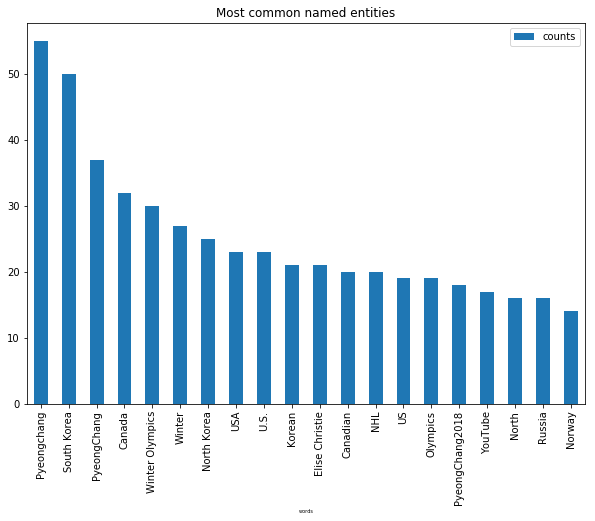

In [126]:
d=[('words', [most_common[k][0] for k in range(len(most_common))]),
   ('counts', [most_common[k][1] for k in range(len(most_common))])]

most_common_df=pd.DataFrame.from_items(d)
most_common_df.set_index('words', inplace=True)
most_common_df.plot(kind='bar', figsize=(10,7), title='Most common named entities')